In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] # sliding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccY is registed now
Build Complete
(254742,)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=16-SGD
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.2462 - val_loss: 0.1861
Epoch 2/50
1s - loss: 0.1407 - val_loss: 0.1027
Epoch 3/50
1s - loss: 0.0798 - val_loss: 0.0624
Epoch 4/50
0s - loss: 0.0527 - val_loss: 0.0452
Epoch 5/50
0s - loss: 0.0405 - val_loss: 0.0366
Epoch 6/50
1s - loss: 0.0339 - val_loss: 0.0315
Epoch 7/50
1s - loss: 0.0297 - val_loss: 0.0281
Epoch 8/50
1s - loss: 0.0269 - val_loss: 0.0257
Epoch 9/50
1s - loss: 0.0248 - val_loss: 0.0240
Epoch 10/50
1s - loss: 0.0233 - val_loss: 0.0227
Epoch 11/50
0s - loss: 0.0221 - val_loss: 0.0216
Epoch 12/50
0s - loss: 0.0212 - val_loss: 0.0208
Epoch 13/50
1s - loss: 0.0204 - val_loss: 0.0201
Epoch 14/50
1s - loss: 0.0198 - val_loss: 0.0195
Epoch 15/50
1s - loss: 0.0192 - val_loss: 0.0189
Epoch 16/50
1s - loss: 0.0187 - val_loss

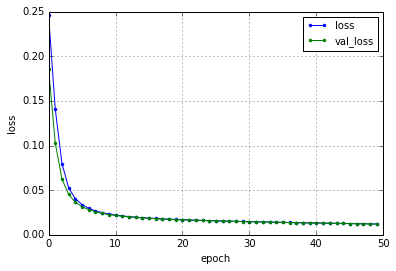

hiden node = 16
-edim=16-Window=128-Overlap=16-Adadelta
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0530 - val_loss: 0.0141
Epoch 2/50
1s - loss: 0.0107 - val_loss: 0.0095
Epoch 3/50
1s - loss: 0.0068 - val_loss: 0.0063
Epoch 4/50
1s - loss: 0.0053 - val_loss: 0.0047
Epoch 5/50
1s - loss: 0.0045 - val_loss: 0.0045
Epoch 6/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
1s - loss: 0.0034 - val_loss: 0.0040
Epoch 9/50
1s - loss: 0.0031 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0028 - val_loss: 0.0067
Epoch 12/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 13/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0024
Epoch 15/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 16/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 17/50
1s - loss: 0.0021 - val_loss: 0.0017
Epoch 18/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 19/50
1s - loss

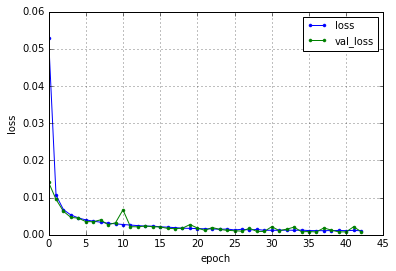

hiden node = 16
-edim=16-Window=128-Overlap=16-Adamax
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0304 - val_loss: 0.0113
Epoch 2/50
1s - loss: 0.0083 - val_loss: 0.0064
Epoch 3/50
1s - loss: 0.0054 - val_loss: 0.0046
Epoch 4/50
1s - loss: 0.0040 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0020 - val_loss: 0.0016
Epoch 7/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0010 - val_loss: 8.6381e-04
Epoch 9/50
1s - loss: 8.4675e-04 - val_loss: 6.8539e-04
Epoch 10/50
1s - loss: 7.2604e-04 - val_loss: 6.2565e-04
Epoch 11/50
1s - loss: 6.1460e-04 - val_loss: 4.9959e-04
Epoch 12/50
1s - loss: 5.3021e-04 - val_loss: 4.7635e-04
Epoch 13/50
1s - loss: 4.9686e-04 - val_loss: 4.3114e-04
Epoch 14/50
1s - loss: 4.8804e-04 - val_loss: 3.8959e-04
Epoch 15/50
1s - loss: 4.5624e-04 - val_loss: 3.6459e-04
Epoch 16/50
1s - loss: 4.2013e-04 - val_loss: 3.3321e-04
Epoch 17/50
1s - loss: 4.0183e-04 - val_loss: 7.6697e

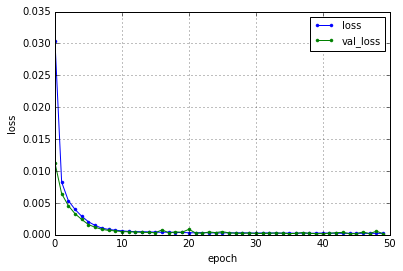

hiden node = 16
-edim=16-Window=128-Overlap=16-Adam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0330 - val_loss: 0.0087
Epoch 2/50
1s - loss: 0.0064 - val_loss: 0.0058
Epoch 3/50
1s - loss: 0.0040 - val_loss: 0.0032
Epoch 4/50
1s - loss: 0.0031 - val_loss: 0.0024
Epoch 5/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
1s - loss: 0.0017 - val_loss: 0.0015
Epoch 7/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
1s - loss: 0.0011 - val_loss: 8.7975e-04
Epoch 9/50
1s - loss: 9.5099e-04 - val_loss: 7.1073e-04
Epoch 10/50
1s - loss: 8.1456e-04 - val_loss: 6.3071e-04
Epoch 11/50
1s - loss: 7.1418e-04 - val_loss: 7.3079e-04
Epoch 12/50
1s - loss: 5.9221e-04 - val_loss: 6.7636e-04
Epoch 13/50
1s - loss: 5.7534e-04 - val_loss: 4.4255e-04
Epoch 14/50
1s - loss: 5.1034e-04 - val_loss: 4.2404e-04
Epoch 15/50
1s - loss: 5.0680e-04 - val_loss: 5.4136e-04
Epoch 16/50
1s - loss: 4.5109e-04 - val_loss: 3.6222e-04
Epoch 17/50
1s - loss: 4.7259e-04 - val_loss: 4.1937e-0

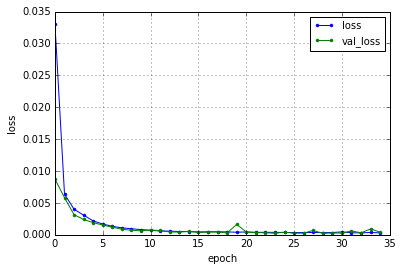

hiden node = 16
-edim=16-Window=128-Overlap=16-Adagrad
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0197 - val_loss: 0.0090
Epoch 2/50
1s - loss: 0.0079 - val_loss: 0.0067
Epoch 3/50
1s - loss: 0.0062 - val_loss: 0.0058
Epoch 4/50
1s - loss: 0.0051 - val_loss: 0.0047
Epoch 5/50
1s - loss: 0.0045 - val_loss: 0.0042
Epoch 6/50
1s - loss: 0.0040 - val_loss: 0.0082
Epoch 7/50
1s - loss: 0.0037 - val_loss: 0.0034
Epoch 8/50
1s - loss: 0.0034 - val_loss: 0.0034
Epoch 9/50
1s - loss: 0.0031 - val_loss: 0.0030
Epoch 10/50
1s - loss: 0.0029 - val_loss: 0.0030
Epoch 11/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0034
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0027
Epoch 17/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 18/50
1s - loss: 0.0019 - val_loss: 0.0021
Epoch 19/50
1s - loss:

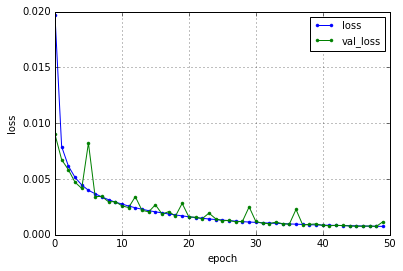

hiden node = 16
-edim=16-Window=128-Overlap=16-RMSprop
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0257 - val_loss: 0.0052
Epoch 2/50
1s - loss: 0.0054 - val_loss: 0.0037
Epoch 3/50
1s - loss: 0.0043 - val_loss: 0.0024
Epoch 4/50
1s - loss: 0.0037 - val_loss: 0.0021
Epoch 5/50
1s - loss: 0.0034 - val_loss: 0.0020
Epoch 6/50
1s - loss: 0.0032 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0023
Epoch 8/50
1s - loss: 0.0030 - val_loss: 0.0050
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0085
Epoch 10/50
1s - loss: 0.0027 - val_loss: 0.0012
Epoch 11/50
1s - loss: 0.0027 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0026 - val_loss: 0.0018
Epoch 13/50
1s - loss: 0.0026 - val_loss: 0.0016
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0013
Epoch 16/50
1s - loss: 0.0025 - val_loss: 0.0013


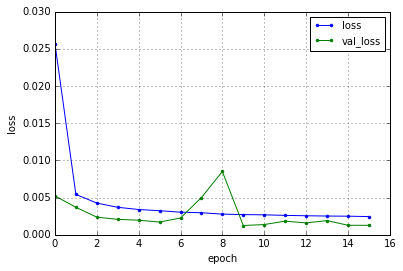

hiden node = 16
-edim=16-Window=128-Overlap=16-Nadam
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0247 - val_loss: 0.0161
Epoch 2/50
1s - loss: 0.0067 - val_loss: 0.0041
Epoch 3/50
1s - loss: 0.0047 - val_loss: 0.0029
Epoch 4/50
1s - loss: 0.0035 - val_loss: 0.0021
Epoch 5/50
1s - loss: 0.0030 - val_loss: 0.0017
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0014
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0020
Epoch 11/50
1s - loss: 0.0016 - val_loss: 0.0012
Epoch 12/50
1s - loss: 0.0017 - val_loss: 9.5481e-04
Epoch 13/50
1s - loss: 0.0014 - val_loss: 8.5188e-04
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0029
Epoch 15/50
1s - loss: 0.0014 - val_loss: 8.3303e-04
Epoch 16/50
1s - loss: 0.0012 - val_loss: 7.2093e-04
Epoch 17/50
1s - loss: 0.0014 - val_loss: 6.7433e-04
Epoch 18/50
1s - loss: 0.0012 - val_loss: 7.4505e-04


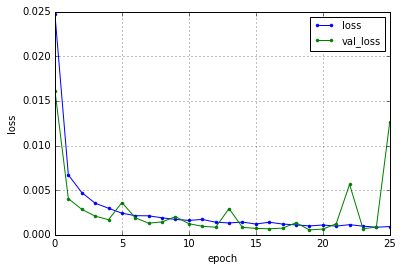

AccY is registed now
Build Complete
(254742,)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=16-SGD
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.2899 - val_loss: 0.2592
Epoch 2/50
1s - loss: 0.2267 - val_loss: 0.1926
Epoch 3/50
1s - loss: 0.1617 - val_loss: 0.1340
Epoch 4/50
1s - loss: 0.1137 - val_loss: 0.0965
Epoch 5/50
1s - loss: 0.0845 - val_loss: 0.0743
Epoch 6/50
1s - loss: 0.0671 - val_loss: 0.0609
Epoch 7/50
1s - loss: 0.0562 - val_loss: 0.0521
Epoch 8/50
1s - loss: 0.0489 - val_loss: 0.0461
Epoch 9/50
1s - loss: 0.0438 - val_loss: 0.0417
Epoch 10/50
1s - loss: 0.0400 - val_loss: 0.0384
Epoch 11/50
1s - loss: 0.0371 - val_loss: 0.0359
Epoch 12/50
1s - loss: 0.0349 - val_loss: 0.0339
Epoch 13/50
1s - loss: 0.0331 - val_loss: 0.0324
Epoch 14/50
1s - loss: 0.0317 - val_loss: 0.0311
Epoch 15/50
1s - loss: 0.0305 - val_loss: 0.0300
Epoch 16/50
1s - loss: 0.0296 - val_loss

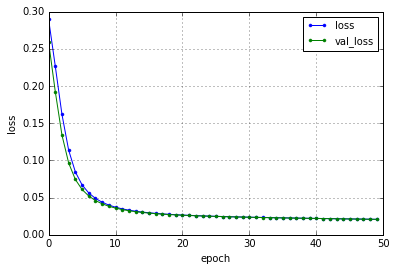

hiden node = 16
-edim=16-Window=256-Overlap=16-Adadelta
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
2s - loss: 0.0562 - val_loss: 0.0258
Epoch 2/50
2s - loss: 0.0171 - val_loss: 0.0141
Epoch 3/50
1s - loss: 0.0125 - val_loss: 0.0109
Epoch 4/50
2s - loss: 0.0101 - val_loss: 0.0261
Epoch 5/50
1s - loss: 0.0087 - val_loss: 0.0143
Epoch 6/50
1s - loss: 0.0080 - val_loss: 0.0069
Epoch 7/50
2s - loss: 0.0074 - val_loss: 0.0073
Epoch 8/50
1s - loss: 0.0069 - val_loss: 0.0111
Epoch 9/50
2s - loss: 0.0064 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0058 - val_loss: 0.0126
Epoch 11/50
1s - loss: 0.0057 - val_loss: 0.0107
Epoch 12/50
1s - loss: 0.0055 - val_loss: 0.0054
Epoch 13/50
2s - loss: 0.0054 - val_loss: 0.0044
Epoch 14/50
1s - loss: 0.0052 - val_loss: 0.0071
Epoch 15/50
1s - loss: 0.0051 - val_loss: 0.0043
Epoch 16/50
1s - loss: 0.0048 - val_loss: 0.0265
Epoch 17/50
1s - loss: 0.0047 - val_loss: 0.0126
Epoch 18/50
1s - loss: 0.0046 - val_loss: 0.0043
Epoch 19/50
1s - loss

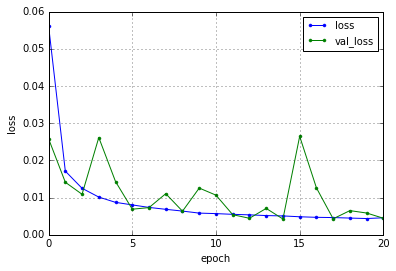

hiden node = 16
-edim=16-Window=256-Overlap=16-Adamax
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0326 - val_loss: 0.0134
Epoch 2/50
1s - loss: 0.0107 - val_loss: 0.0086
Epoch 3/50
1s - loss: 0.0076 - val_loss: 0.0063
Epoch 4/50
1s - loss: 0.0056 - val_loss: 0.0070
Epoch 5/50
1s - loss: 0.0043 - val_loss: 0.0035
Epoch 6/50
1s - loss: 0.0032 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 8/50
1s - loss: 0.0022 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0058
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0026
Epoch 12/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0018
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
1s - loss: 0.0010 - val_loss: 0.0013
Epoch 18/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 19/50
1s - loss: 

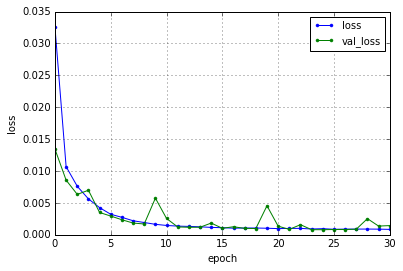

hiden node = 16
-edim=16-Window=256-Overlap=16-Adam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0363 - val_loss: 0.0116
Epoch 2/50
1s - loss: 0.0088 - val_loss: 0.0066
Epoch 3/50
1s - loss: 0.0060 - val_loss: 0.0058
Epoch 4/50
1s - loss: 0.0046 - val_loss: 0.0038
Epoch 5/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 6/50
1s - loss: 0.0030 - val_loss: 0.0028
Epoch 7/50
1s - loss: 0.0026 - val_loss: 0.0022
Epoch 8/50
1s - loss: 0.0022 - val_loss: 0.0059
Epoch 9/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
1s - loss: 0.0016 - val_loss: 0.0036
Epoch 12/50
1s - loss: 0.0019 - val_loss: 0.0014
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0013 - val_loss: 0.0015
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0024
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0010
Epoch 18/50
1s - loss: 0.0013 - val_loss: 0.0040
Epoch 19/50
1s - loss: 0.

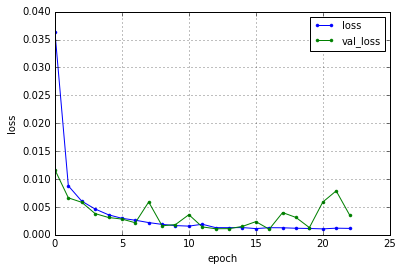

hiden node = 16
-edim=16-Window=256-Overlap=16-Adagrad
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0258 - val_loss: 0.0204
Epoch 2/50
1s - loss: 0.0119 - val_loss: 0.0098
Epoch 3/50
1s - loss: 0.0090 - val_loss: 0.0125
Epoch 4/50
1s - loss: 0.0076 - val_loss: 0.0068
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0062
Epoch 6/50
1s - loss: 0.0062 - val_loss: 0.0128
Epoch 7/50
1s - loss: 0.0057 - val_loss: 0.0061
Epoch 8/50
1s - loss: 0.0053 - val_loss: 0.0051
Epoch 9/50
1s - loss: 0.0050 - val_loss: 0.0046
Epoch 10/50
1s - loss: 0.0046 - val_loss: 0.0045
Epoch 11/50
2s - loss: 0.0044 - val_loss: 0.0046
Epoch 12/50
2s - loss: 0.0042 - val_loss: 0.0048
Epoch 13/50
2s - loss: 0.0040 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0038 - val_loss: 0.0036
Epoch 15/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 16/50
1s - loss: 0.0036 - val_loss: 0.0042
Epoch 17/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 18/50
2s - loss: 0.0033 - val_loss: 0.0032
Epoch 19/50
2s - loss:

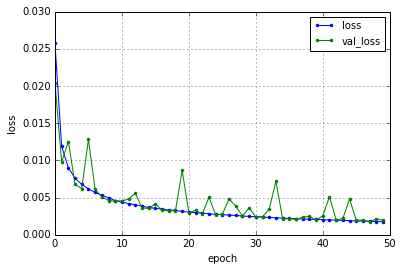

hiden node = 16
-edim=16-Window=256-Overlap=16-RMSprop
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0298 - val_loss: 0.0449
Epoch 2/50
2s - loss: 0.0107 - val_loss: 0.0149
Epoch 3/50
2s - loss: 0.0088 - val_loss: 0.0185
Epoch 4/50
2s - loss: 0.0079 - val_loss: 0.0122
Epoch 5/50
2s - loss: 0.0072 - val_loss: 0.0142
Epoch 6/50
2s - loss: 0.0066 - val_loss: 0.0081
Epoch 7/50
2s - loss: 0.0064 - val_loss: 0.0086
Epoch 8/50
2s - loss: 0.0060 - val_loss: 0.0094
Epoch 9/50
2s - loss: 0.0058 - val_loss: 0.0278
Epoch 10/50
2s - loss: 0.0055 - val_loss: 0.0095
Epoch 11/50
2s - loss: 0.0054 - val_loss: 0.0040
Epoch 12/50
1s - loss: 0.0053 - val_loss: 0.0038
Epoch 13/50
1s - loss: 0.0051 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0051 - val_loss: 0.0042
Epoch 15/50
1s - loss: 0.0050 - val_loss: 0.0074
Epoch 16/50
1s - loss: 0.0049 - val_loss: 0.0042
Epoch 17/50
2s - loss: 0.0049 - val_loss: 0.0256
Epoch 18/50
2s - loss: 0.0049 - val_loss: 0.0050
Epoch 19/50
2s - loss:

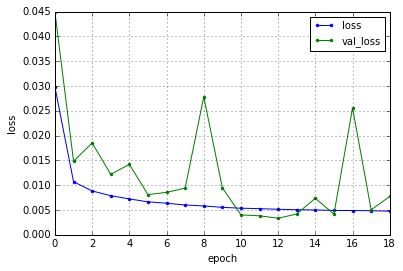

hiden node = 16
-edim=16-Window=256-Overlap=16-Nadam
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
1s - loss: 0.0281 - val_loss: 0.0110
Epoch 2/50
1s - loss: 0.0107 - val_loss: 0.0070
Epoch 3/50
1s - loss: 0.0081 - val_loss: 0.0145
Epoch 4/50
1s - loss: 0.0067 - val_loss: 0.0237
Epoch 5/50
2s - loss: 0.0057 - val_loss: 0.0189
Epoch 6/50
1s - loss: 0.0051 - val_loss: 0.0030
Epoch 7/50
1s - loss: 0.0044 - val_loss: 0.0033
Epoch 8/50
1s - loss: 0.0041 - val_loss: 0.0160
Epoch 9/50
1s - loss: 0.0039 - val_loss: 0.0028
Epoch 10/50
1s - loss: 0.0037 - val_loss: 0.0049
Epoch 11/50
1s - loss: 0.0035 - val_loss: 0.0022
Epoch 12/50
1s - loss: 0.0033 - val_loss: 0.0048
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0017
Epoch 14/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 15/50
1s - loss: 0.0029 - val_loss: 0.0020
Epoch 16/50
1s - loss: 0.0028 - val_loss: 0.0162
Epoch 17/50
1s - loss: 0.0027 - val_loss: 0.0038
Epoch 18/50
1s - loss: 0.0026 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0

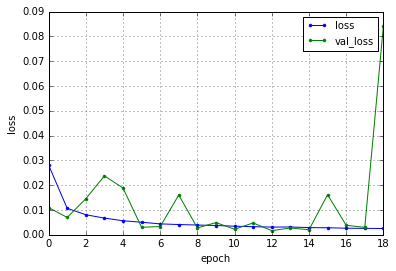

AccY is registed now
Build Complete
(254742,)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=16-SGD
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.2960 - val_loss: 0.2769
Epoch 2/50
1s - loss: 0.2579 - val_loss: 0.2382
Epoch 3/50
1s - loss: 0.2184 - val_loss: 0.1988
Epoch 4/50
1s - loss: 0.1807 - val_loss: 0.1636
Epoch 5/50
1s - loss: 0.1490 - val_loss: 0.1356
Epoch 6/50
1s - loss: 0.1247 - val_loss: 0.1148
Epoch 7/50
1s - loss: 0.1067 - val_loss: 0.0994
Epoch 8/50
1s - loss: 0.0933 - val_loss: 0.0877
Epoch 9/50
1s - loss: 0.0830 - val_loss: 0.0786
Epoch 10/50
1s - loss: 0.0748 - val_loss: 0.0713
Epoch 11/50
1s - loss: 0.0683 - val_loss: 0.0655
Epoch 12/50
1s - loss: 0.0630 - val_loss: 0.0607
Epoch 13/50
1s - loss: 0.0587 - val_loss: 0.0568
Epoch 14/50
1s - loss: 0.0551 - val_loss: 0.0535
Epoch 15/50
1s - loss: 0.0521 - val_loss: 0.0508
Epoch 16/50
1s - loss: 0.0496 - val_loss

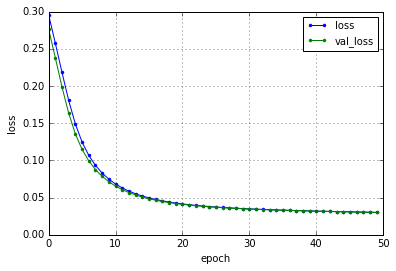

hiden node = 16
-edim=16-Window=512-Overlap=16-Adadelta
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0597 - val_loss: 0.0283
Epoch 2/50
1s - loss: 0.0239 - val_loss: 0.0203
Epoch 3/50
1s - loss: 0.0194 - val_loss: 0.0172
Epoch 4/50
1s - loss: 0.0168 - val_loss: 0.0148
Epoch 5/50
1s - loss: 0.0153 - val_loss: 0.0137
Epoch 6/50
1s - loss: 0.0138 - val_loss: 0.0120
Epoch 7/50
1s - loss: 0.0128 - val_loss: 0.0116
Epoch 8/50
1s - loss: 0.0124 - val_loss: 0.0104
Epoch 9/50
1s - loss: 0.0117 - val_loss: 0.0114
Epoch 10/50
1s - loss: 0.0113 - val_loss: 0.0112
Epoch 11/50
1s - loss: 0.0108 - val_loss: 0.0105
Epoch 12/50
1s - loss: 0.0103 - val_loss: 0.0136
Epoch 13/50
1s - loss: 0.0101 - val_loss: 0.0093
Epoch 14/50
1s - loss: 0.0097 - val_loss: 0.0097
Epoch 15/50
1s - loss: 0.0096 - val_loss: 0.0095
Epoch 16/50
1s - loss: 0.0093 - val_loss: 0.0076
Epoch 17/50
1s - loss: 0.0092 - val_loss: 0.0076
Epoch 18/50
1s - loss: 0.0088 - val_loss: 0.0092
Epoch 19/50
1s - loss

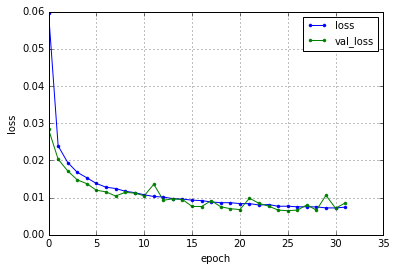

hiden node = 16
-edim=16-Window=512-Overlap=16-Adamax
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0378 - val_loss: 0.0197
Epoch 2/50
1s - loss: 0.0163 - val_loss: 0.0134
Epoch 3/50
1s - loss: 0.0114 - val_loss: 0.0095
Epoch 4/50
1s - loss: 0.0086 - val_loss: 0.0080
Epoch 5/50
1s - loss: 0.0067 - val_loss: 0.0057
Epoch 6/50
1s - loss: 0.0055 - val_loss: 0.0048
Epoch 7/50
1s - loss: 0.0047 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0044 - val_loss: 0.0039
Epoch 9/50
1s - loss: 0.0041 - val_loss: 0.0036
Epoch 10/50
1s - loss: 0.0037 - val_loss: 0.0037
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0035
Epoch 12/50
1s - loss: 0.0034 - val_loss: 0.0035
Epoch 13/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0034 - val_loss: 0.0031
Epoch 15/50
1s - loss: 0.0033 - val_loss: 0.0032
Epoch 16/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 17/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 18/50
1s - loss: 0.0033 - val_loss: 0.0030
Epoch 19/50
1s - loss: 

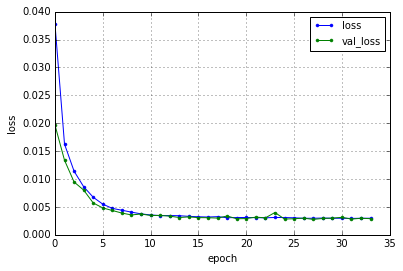

hiden node = 16
-edim=16-Window=512-Overlap=16-Adam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0388 - val_loss: 0.0156
Epoch 2/50
1s - loss: 0.0127 - val_loss: 0.0099
Epoch 3/50
1s - loss: 0.0090 - val_loss: 0.0073
Epoch 4/50
1s - loss: 0.0074 - val_loss: 0.0065
Epoch 5/50
1s - loss: 0.0059 - val_loss: 0.0053
Epoch 6/50
1s - loss: 0.0053 - val_loss: 0.0049
Epoch 7/50
1s - loss: 0.0047 - val_loss: 0.0043
Epoch 8/50
1s - loss: 0.0042 - val_loss: 0.0042
Epoch 9/50
1s - loss: 0.0041 - val_loss: 0.0041
Epoch 10/50
1s - loss: 0.0040 - val_loss: 0.0039
Epoch 11/50
1s - loss: 0.0036 - val_loss: 0.0042
Epoch 12/50
1s - loss: 0.0039 - val_loss: 0.0036
Epoch 13/50
1s - loss: 0.0036 - val_loss: 0.0049
Epoch 14/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 15/50
1s - loss: 0.0035 - val_loss: 0.0052
Epoch 16/50
1s - loss: 0.0036 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 18/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 19/50
1s - loss: 0.

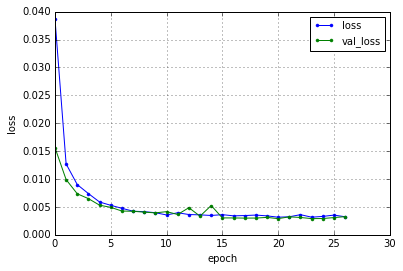

hiden node = 16
-edim=16-Window=512-Overlap=16-Adagrad
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0332 - val_loss: 0.0183
Epoch 2/50
1s - loss: 0.0173 - val_loss: 0.0147
Epoch 3/50
1s - loss: 0.0138 - val_loss: 0.0118
Epoch 4/50
1s - loss: 0.0115 - val_loss: 0.0114
Epoch 5/50
1s - loss: 0.0104 - val_loss: 0.0093
Epoch 6/50
1s - loss: 0.0095 - val_loss: 0.0092
Epoch 7/50
1s - loss: 0.0089 - val_loss: 0.0087
Epoch 8/50
1s - loss: 0.0085 - val_loss: 0.0079
Epoch 9/50
1s - loss: 0.0080 - val_loss: 0.0074
Epoch 10/50
1s - loss: 0.0075 - val_loss: 0.0095
Epoch 11/50
1s - loss: 0.0073 - val_loss: 0.0069
Epoch 12/50
1s - loss: 0.0070 - val_loss: 0.0067
Epoch 13/50
1s - loss: 0.0068 - val_loss: 0.0064
Epoch 14/50
1s - loss: 0.0066 - val_loss: 0.0063
Epoch 15/50
1s - loss: 0.0065 - val_loss: 0.0060
Epoch 16/50
1s - loss: 0.0062 - val_loss: 0.0058
Epoch 17/50
1s - loss: 0.0061 - val_loss: 0.0063
Epoch 18/50
1s - loss: 0.0059 - val_loss: 0.0087
Epoch 19/50
1s - loss:

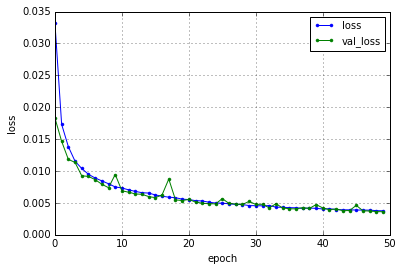

hiden node = 16
-edim=16-Window=512-Overlap=16-RMSprop
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0350 - val_loss: 0.0147
Epoch 2/50
1s - loss: 0.0174 - val_loss: 0.0154
Epoch 3/50
1s - loss: 0.0150 - val_loss: 0.0100
Epoch 4/50
1s - loss: 0.0135 - val_loss: 0.0091
Epoch 5/50
1s - loss: 0.0127 - val_loss: 0.0099
Epoch 6/50
1s - loss: 0.0119 - val_loss: 0.0089
Epoch 7/50
1s - loss: 0.0114 - val_loss: 0.0075
Epoch 8/50
1s - loss: 0.0111 - val_loss: 0.0093
Epoch 9/50
1s - loss: 0.0107 - val_loss: 0.0073
Epoch 10/50
1s - loss: 0.0105 - val_loss: 0.0097
Epoch 11/50
1s - loss: 0.0103 - val_loss: 0.0066
Epoch 12/50
1s - loss: 0.0101 - val_loss: 0.0068
Epoch 13/50
1s - loss: 0.0101 - val_loss: 0.0137
Epoch 14/50
1s - loss: 0.0099 - val_loss: 0.0071
Epoch 15/50
1s - loss: 0.0099 - val_loss: 0.0084
Epoch 16/50
1s - loss: 0.0098 - val_loss: 0.0078
Epoch 17/50
1s - loss: 0.0097 - val_loss: 0.0129


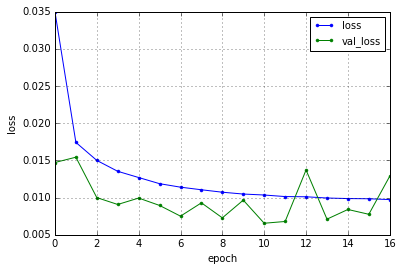

hiden node = 16
-edim=16-Window=512-Overlap=16-Nadam
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0366 - val_loss: 0.0179
Epoch 2/50
1s - loss: 0.0175 - val_loss: 0.0151
Epoch 3/50
1s - loss: 0.0142 - val_loss: 0.0097
Epoch 4/50
1s - loss: 0.0119 - val_loss: 0.0504
Epoch 5/50
1s - loss: 0.0107 - val_loss: 0.0068
Epoch 6/50
1s - loss: 0.0095 - val_loss: 0.0309
Epoch 7/50
1s - loss: 0.0090 - val_loss: 0.0076
Epoch 8/50
1s - loss: 0.0089 - val_loss: 0.0066
Epoch 9/50
1s - loss: 0.0082 - val_loss: 0.0054
Epoch 10/50
1s - loss: 0.0082 - val_loss: 0.0068
Epoch 11/50
1s - loss: 0.0077 - val_loss: 0.0060
Epoch 12/50
1s - loss: 0.0077 - val_loss: 0.0068
Epoch 13/50
1s - loss: 0.0075 - val_loss: 0.0071
Epoch 14/50
1s - loss: 0.0073 - val_loss: 0.0092
Epoch 15/50
1s - loss: 0.0069 - val_loss: 0.0061


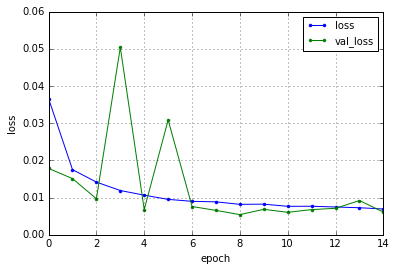

AccY is registed now
Build Complete
(254742,)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=16-SGD
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.2981 - val_loss: 0.2885
Epoch 2/50
2s - loss: 0.2766 - val_loss: 0.2636
Epoch 3/50
2s - loss: 0.2498 - val_loss: 0.2360
Epoch 4/50
2s - loss: 0.2231 - val_loss: 0.2107
Epoch 5/50
2s - loss: 0.1996 - val_loss: 0.1890
Epoch 6/50
1s - loss: 0.1796 - val_loss: 0.1706
Epoch 7/50
1s - loss: 0.1627 - val_loss: 0.1552
Epoch 8/50
1s - loss: 0.1486 - val_loss: 0.1423
Epoch 9/50
1s - loss: 0.1367 - val_loss: 0.1313
Epoch 10/50
2s - loss: 0.1265 - val_loss: 0.1219
Epoch 11/50
2s - loss: 0.1178 - val_loss: 0.1138
Epoch 12/50
2s - loss: 0.1101 - val_loss: 0.1066
Epoch 13/50
1s - loss: 0.1034 - val_loss: 0.1003
Epoch 14/50
1s - loss: 0.0975 - val_loss: 0.0948
Epoch 15/50
2s - loss: 0.0923 - val_loss: 0.0898
Epoch 16/50
2s - loss: 0.0876 - val_lo

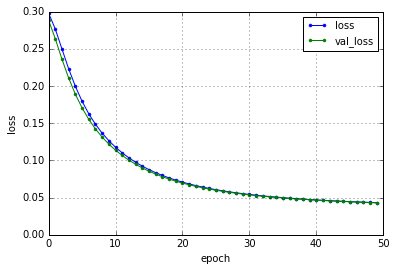

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adadelta
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0757 - val_loss: 0.0381
Epoch 2/50
1s - loss: 0.0337 - val_loss: 0.0313
Epoch 3/50
2s - loss: 0.0295 - val_loss: 0.0270
Epoch 4/50
1s - loss: 0.0268 - val_loss: 0.0287
Epoch 5/50
1s - loss: 0.0246 - val_loss: 0.0222
Epoch 6/50
2s - loss: 0.0235 - val_loss: 0.0233
Epoch 7/50
2s - loss: 0.0221 - val_loss: 0.0268
Epoch 8/50
1s - loss: 0.0215 - val_loss: 0.0310
Epoch 9/50
1s - loss: 0.0209 - val_loss: 0.0182
Epoch 10/50
1s - loss: 0.0199 - val_loss: 0.0184
Epoch 11/50
1s - loss: 0.0196 - val_loss: 0.0188
Epoch 12/50
2s - loss: 0.0188 - val_loss: 0.0214
Epoch 13/50
2s - loss: 0.0180 - val_loss: 0.0189
Epoch 14/50
1s - loss: 0.0181 - val_loss: 0.0157
Epoch 15/50
2s - loss: 0.0177 - val_loss: 0.0155
Epoch 16/50
1s - loss: 0.0171 - val_loss: 0.0189
Epoch 17/50
1s - loss: 0.0167 - val_loss: 0.0143
Epoch 18/50
1s - loss: 0.0165 - val_loss: 0.0143
Epoch 19/50
2s - los

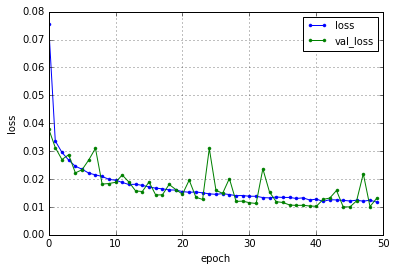

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adamax
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0420 - val_loss: 0.0236
Epoch 2/50
1s - loss: 0.0203 - val_loss: 0.0168
Epoch 3/50
2s - loss: 0.0149 - val_loss: 0.0132
Epoch 4/50
2s - loss: 0.0119 - val_loss: 0.0107
Epoch 5/50
1s - loss: 0.0101 - val_loss: 0.0088
Epoch 6/50
2s - loss: 0.0084 - val_loss: 0.0079
Epoch 7/50
1s - loss: 0.0078 - val_loss: 0.0070
Epoch 8/50
3s - loss: 0.0073 - val_loss: 0.0066
Epoch 9/50
3s - loss: 0.0071 - val_loss: 0.0063
Epoch 10/50
3s - loss: 0.0067 - val_loss: 0.0062
Epoch 11/50
2s - loss: 0.0064 - val_loss: 0.0060
Epoch 12/50
3s - loss: 0.0063 - val_loss: 0.0066
Epoch 13/50
2s - loss: 0.0063 - val_loss: 0.0072
Epoch 14/50
3s - loss: 0.0062 - val_loss: 0.0069
Epoch 15/50
3s - loss: 0.0065 - val_loss: 0.0068
Epoch 16/50
3s - loss: 0.0060 - val_loss: 0.0072
Epoch 17/50
3s - loss: 0.0061 - val_loss: 0.0056
Epoch 18/50
2s - loss: 0.0060 - val_loss: 0.0057
Epoch 19/50
2s - loss:

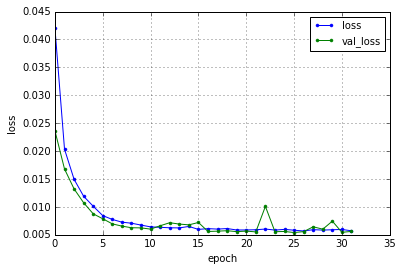

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0420 - val_loss: 0.0220
Epoch 2/50
1s - loss: 0.0175 - val_loss: 0.0181
Epoch 3/50
2s - loss: 0.0132 - val_loss: 0.0230
Epoch 4/50
2s - loss: 0.0124 - val_loss: 0.0128
Epoch 5/50
1s - loss: 0.0094 - val_loss: 0.0100
Epoch 6/50
1s - loss: 0.0092 - val_loss: 0.0078
Epoch 7/50
2s - loss: 0.0089 - val_loss: 0.0192
Epoch 8/50
2s - loss: 0.0075 - val_loss: 0.0072
Epoch 9/50
2s - loss: 0.0077 - val_loss: 0.0077
Epoch 10/50
2s - loss: 0.0074 - val_loss: 0.0075
Epoch 11/50
1s - loss: 0.0070 - val_loss: 0.0063
Epoch 12/50
2s - loss: 0.0070 - val_loss: 0.0110
Epoch 13/50
2s - loss: 0.0071 - val_loss: 0.0066
Epoch 14/50
2s - loss: 0.0072 - val_loss: 0.0107
Epoch 15/50
2s - loss: 0.0071 - val_loss: 0.0063
Epoch 16/50
2s - loss: 0.0065 - val_loss: 0.0061
Epoch 17/50
1s - loss: 0.0070 - val_loss: 0.0066
Epoch 18/50
1s - loss: 0.0080 - val_loss: 0.0073
Epoch 19/50
2s - loss: 0

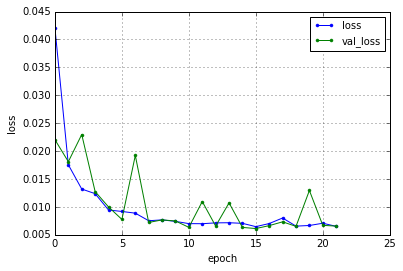

hiden node = 16
-edim=16-Window=1024-Overlap=16-Adagrad
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
2s - loss: 0.0402 - val_loss: 0.0244
Epoch 2/50
1s - loss: 0.0232 - val_loss: 0.0225
Epoch 3/50
2s - loss: 0.0192 - val_loss: 0.0166
Epoch 4/50
1s - loss: 0.0169 - val_loss: 0.0148
Epoch 5/50
1s - loss: 0.0153 - val_loss: 0.0204
Epoch 6/50
1s - loss: 0.0143 - val_loss: 0.0133
Epoch 7/50
2s - loss: 0.0134 - val_loss: 0.0117
Epoch 8/50
2s - loss: 0.0124 - val_loss: 0.0115
Epoch 9/50
1s - loss: 0.0119 - val_loss: 0.0107
Epoch 10/50
1s - loss: 0.0114 - val_loss: 0.0105
Epoch 11/50
1s - loss: 0.0112 - val_loss: 0.0118
Epoch 12/50
1s - loss: 0.0107 - val_loss: 0.0097
Epoch 13/50
1s - loss: 0.0104 - val_loss: 0.0096
Epoch 14/50
1s - loss: 0.0100 - val_loss: 0.0094
Epoch 15/50
1s - loss: 0.0099 - val_loss: 0.0101
Epoch 16/50
1s - loss: 0.0095 - val_loss: 0.0096
Epoch 17/50
1s - loss: 0.0092 - val_loss: 0.0085
Epoch 18/50
1s - loss: 0.0090 - val_loss: 0.0083
Epoch 19/50
1s - loss

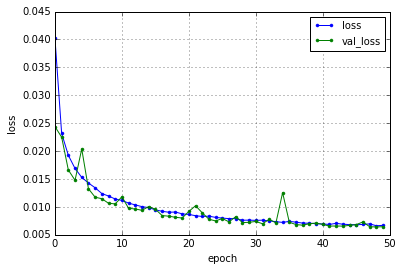

hiden node = 16
-edim=16-Window=1024-Overlap=16-RMSprop
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0449 - val_loss: 0.0235
Epoch 2/50
1s - loss: 0.0279 - val_loss: 0.0269
Epoch 3/50
1s - loss: 0.0247 - val_loss: 0.0205
Epoch 4/50
1s - loss: 0.0228 - val_loss: 0.0165
Epoch 5/50
1s - loss: 0.0218 - val_loss: 0.0155
Epoch 6/50
1s - loss: 0.0205 - val_loss: 0.0163
Epoch 7/50
2s - loss: 0.0195 - val_loss: 0.0169
Epoch 8/50
2s - loss: 0.0191 - val_loss: 0.0158
Epoch 9/50
2s - loss: 0.0185 - val_loss: 0.0282
Epoch 10/50
2s - loss: 0.0180 - val_loss: 0.0202
Epoch 11/50
2s - loss: 0.0178 - val_loss: 0.0172


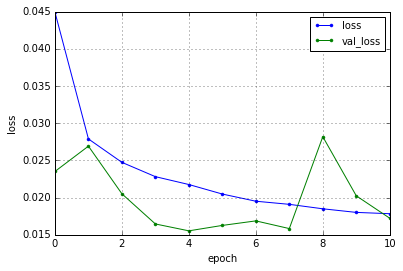

hiden node = 16
-edim=16-Window=1024-Overlap=16-Nadam
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0459 - val_loss: 0.0285
Epoch 2/50
2s - loss: 0.0277 - val_loss: 0.0202
Epoch 3/50
1s - loss: 0.0248 - val_loss: 0.0396
Epoch 4/50
1s - loss: 0.0215 - val_loss: 0.0163
Epoch 5/50
1s - loss: 0.0190 - val_loss: 0.0413
Epoch 6/50
1s - loss: 0.0186 - val_loss: 0.0206
Epoch 7/50
1s - loss: 0.0169 - val_loss: 0.0177
Epoch 8/50
2s - loss: 0.0159 - val_loss: 0.0147
Epoch 9/50
2s - loss: 0.0157 - val_loss: 0.0190
Epoch 10/50
2s - loss: 0.0150 - val_loss: 0.0360
Epoch 11/50
1s - loss: 0.0158 - val_loss: 0.0111
Epoch 12/50
1s - loss: 0.0150 - val_loss: 0.0193
Epoch 13/50
2s - loss: 0.0142 - val_loss: 0.0122
Epoch 14/50
1s - loss: 0.0138 - val_loss: 0.0151
Epoch 15/50
1s - loss: 0.0137 - val_loss: 0.0107
Epoch 16/50
1s - loss: 0.0135 - val_loss: 0.0123
Epoch 17/50
2s - loss: 0.0139 - val_loss: 0.0133
Epoch 18/50
1s - loss: 0.0127 - val_loss: 0.0096
Epoch 19/50
1s - loss: 

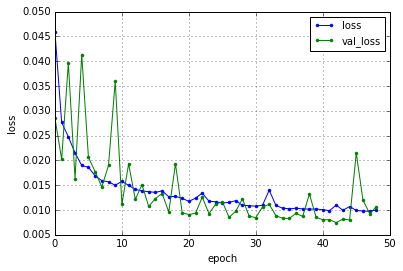

AccY is registed now
Build Complete
(254742,)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=16-SGD
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.3015 - val_loss: 0.2970
Epoch 2/50
3s - loss: 0.2910 - val_loss: 0.2843
Epoch 3/50
3s - loss: 0.2768 - val_loss: 0.2692
Epoch 4/50
3s - loss: 0.2618 - val_loss: 0.2543
Epoch 5/50
3s - loss: 0.2472 - val_loss: 0.2402
Epoch 6/50
3s - loss: 0.2336 - val_loss: 0.2272
Epoch 7/50
4s - loss: 0.2211 - val_loss: 0.2152
Epoch 8/50
4s - loss: 0.2097 - val_loss: 0.2043
Epoch 9/50
4s - loss: 0.1993 - val_loss: 0.1944
Epoch 10/50
3s - loss: 0.1898 - val_loss: 0.1854
Epoch 11/50
4s - loss: 0.1812 - val_loss: 0.1772
Epoch 12/50
3s - loss: 0.1734 - val_loss: 0.1697
Epoch 13/50
4s - loss: 0.1663 - val_loss: 0.1629
Epoch 14/50
4s - loss: 0.1597 - val_loss: 0.1566
Epoch 15/50
3s - loss: 0.1537 - val_loss: 0.1508
Epoch 16/50
4s - loss: 0.1481 - val_lo

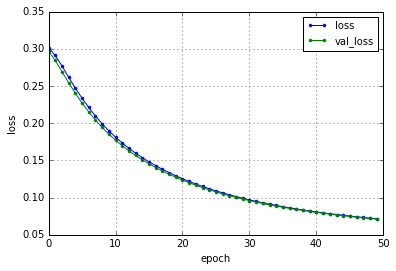

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adadelta
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.1035 - val_loss: 0.0522
Epoch 2/50
3s - loss: 0.0462 - val_loss: 0.0413
Epoch 3/50
3s - loss: 0.0396 - val_loss: 0.0361
Epoch 4/50
3s - loss: 0.0364 - val_loss: 0.0338
Epoch 5/50
3s - loss: 0.0347 - val_loss: 0.0324
Epoch 6/50
3s - loss: 0.0335 - val_loss: 0.0367
Epoch 7/50
3s - loss: 0.0319 - val_loss: 0.0332
Epoch 8/50
4s - loss: 0.0309 - val_loss: 0.0282
Epoch 9/50
4s - loss: 0.0301 - val_loss: 0.0277
Epoch 10/50
4s - loss: 0.0293 - val_loss: 0.0265
Epoch 11/50
4s - loss: 0.0288 - val_loss: 0.0256
Epoch 12/50
4s - loss: 0.0285 - val_loss: 0.0311
Epoch 13/50
3s - loss: 0.0282 - val_loss: 0.0305
Epoch 14/50
3s - loss: 0.0275 - val_loss: 0.0248
Epoch 15/50
3s - loss: 0.0273 - val_loss: 0.0256
Epoch 16/50
3s - loss: 0.0271 - val_loss: 0.0263
Epoch 17/50
3s - loss: 0.0263 - val_loss: 0.0279
Epoch 18/50
3s - loss: 0.0260 - val_loss: 0.0243
Epoch 19/50
3s - los

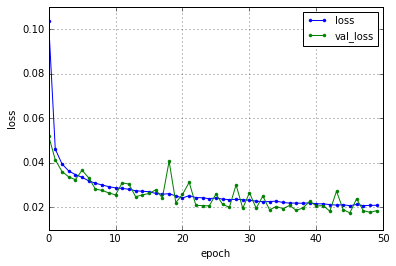

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adamax
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0522 - val_loss: 0.0306
Epoch 2/50
4s - loss: 0.0271 - val_loss: 0.0240
Epoch 3/50
4s - loss: 0.0220 - val_loss: 0.0193
Epoch 4/50
4s - loss: 0.0187 - val_loss: 0.0166
Epoch 5/50
3s - loss: 0.0156 - val_loss: 0.0139
Epoch 6/50
3s - loss: 0.0144 - val_loss: 0.0136
Epoch 7/50
4s - loss: 0.0141 - val_loss: 0.0170
Epoch 8/50
4s - loss: 0.0132 - val_loss: 0.0131
Epoch 9/50
4s - loss: 0.0130 - val_loss: 0.0238
Epoch 10/50
4s - loss: 0.0128 - val_loss: 0.0123
Epoch 11/50
4s - loss: 0.0125 - val_loss: 0.0180
Epoch 12/50
4s - loss: 0.0125 - val_loss: 0.0114
Epoch 13/50
3s - loss: 0.0121 - val_loss: 0.0144
Epoch 14/50
5s - loss: 0.0123 - val_loss: 0.0114
Epoch 15/50
4s - loss: 0.0120 - val_loss: 0.0128
Epoch 16/50
4s - loss: 0.0120 - val_loss: 0.0113
Epoch 17/50
4s - loss: 0.0121 - val_loss: 0.0120
Epoch 18/50
4s - loss: 0.0120 - val_loss: 0.0113
Epoch 19/50
4s - loss:

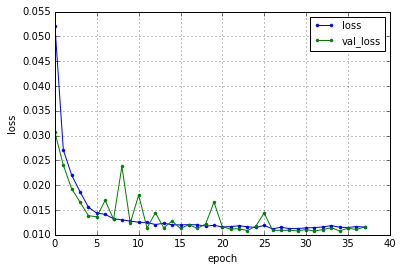

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0522 - val_loss: 0.0312
Epoch 2/50
3s - loss: 0.0273 - val_loss: 0.0208
Epoch 3/50
3s - loss: 0.0221 - val_loss: 0.0213
Epoch 4/50
3s - loss: 0.0216 - val_loss: 0.0190
Epoch 5/50
3s - loss: 0.0170 - val_loss: 0.0165
Epoch 6/50
3s - loss: 0.0154 - val_loss: 0.0138
Epoch 7/50
4s - loss: 0.0159 - val_loss: 0.0159
Epoch 8/50
4s - loss: 0.0147 - val_loss: 0.0137
Epoch 9/50
3s - loss: 0.0144 - val_loss: 0.0131
Epoch 10/50
4s - loss: 0.0147 - val_loss: 0.0198
Epoch 11/50
4s - loss: 0.0138 - val_loss: 0.0131
Epoch 12/50
4s - loss: 0.0141 - val_loss: 0.0131
Epoch 13/50
3s - loss: 0.0136 - val_loss: 0.0121
Epoch 14/50
3s - loss: 0.0148 - val_loss: 0.0149
Epoch 15/50
3s - loss: 0.0137 - val_loss: 0.0134
Epoch 16/50
4s - loss: 0.0149 - val_loss: 0.0127
Epoch 17/50
3s - loss: 0.0132 - val_loss: 0.0131
Epoch 18/50
4s - loss: 0.0144 - val_loss: 0.0140
Epoch 19/50
4s - loss: 0

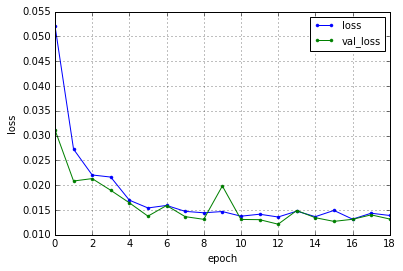

hiden node = 16
-edim=16-Window=2048-Overlap=16-Adagrad
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0555 - val_loss: 0.0371
Epoch 2/50
4s - loss: 0.0325 - val_loss: 0.0310
Epoch 3/50
4s - loss: 0.0270 - val_loss: 0.0241
Epoch 4/50
4s - loss: 0.0238 - val_loss: 0.0216
Epoch 5/50
4s - loss: 0.0219 - val_loss: 0.0291
Epoch 6/50
4s - loss: 0.0207 - val_loss: 0.0194
Epoch 7/50
3s - loss: 0.0193 - val_loss: 0.0217
Epoch 8/50
4s - loss: 0.0188 - val_loss: 0.0221
Epoch 9/50
4s - loss: 0.0186 - val_loss: 0.0165
Epoch 10/50
3s - loss: 0.0179 - val_loss: 0.0168
Epoch 11/50
3s - loss: 0.0176 - val_loss: 0.0162
Epoch 12/50
4s - loss: 0.0170 - val_loss: 0.0179
Epoch 13/50
3s - loss: 0.0169 - val_loss: 0.0154
Epoch 14/50
3s - loss: 0.0166 - val_loss: 0.0151
Epoch 15/50
5s - loss: 0.0160 - val_loss: 0.0154
Epoch 16/50
5s - loss: 0.0161 - val_loss: 0.0156
Epoch 17/50
3s - loss: 0.0157 - val_loss: 0.0391
Epoch 18/50
4s - loss: 0.0156 - val_loss: 0.0142
Epoch 19/50
4s - loss

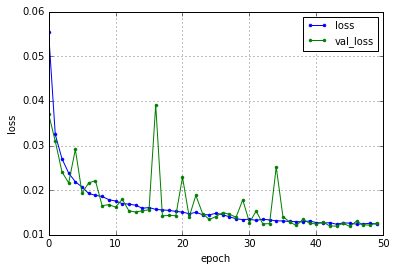

hiden node = 16
-edim=16-Window=2048-Overlap=16-RMSprop
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
6s - loss: 0.0592 - val_loss: 0.1496
Epoch 2/50
5s - loss: 0.0416 - val_loss: 0.0390
Epoch 3/50
4s - loss: 0.0385 - val_loss: 0.0489
Epoch 4/50
3s - loss: 0.0362 - val_loss: 0.0314
Epoch 5/50
3s - loss: 0.0345 - val_loss: 0.0251
Epoch 6/50
3s - loss: 0.0334 - val_loss: 0.0279
Epoch 7/50
4s - loss: 0.0322 - val_loss: 0.0262
Epoch 8/50
4s - loss: 0.0315 - val_loss: 0.0238
Epoch 9/50
4s - loss: 0.0306 - val_loss: 0.0489
Epoch 10/50
4s - loss: 0.0302 - val_loss: 0.0225
Epoch 11/50
4s - loss: 0.0297 - val_loss: 0.0216
Epoch 12/50
4s - loss: 0.0290 - val_loss: 0.0220
Epoch 13/50
4s - loss: 0.0290 - val_loss: 0.0231
Epoch 14/50
3s - loss: 0.0286 - val_loss: 0.0293
Epoch 15/50
3s - loss: 0.0284 - val_loss: 0.0235
Epoch 16/50
6s - loss: 0.0283 - val_loss: 0.0256
Epoch 17/50
4s - loss: 0.0279 - val_loss: 0.0210
Epoch 18/50
4s - loss: 0.0278 - val_loss: 0.0225
Epoch 19/50
3s - loss

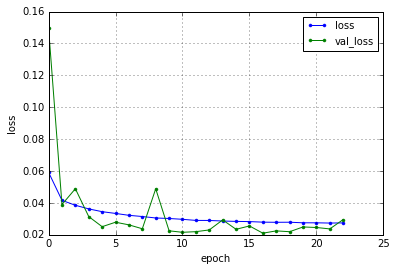

hiden node = 16
-edim=16-Window=2048-Overlap=16-Nadam
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0715 - val_loss: 0.0525
Epoch 2/50
3s - loss: 0.0550 - val_loss: 0.0505
Epoch 3/50
3s - loss: 0.0433 - val_loss: 0.0372
Epoch 4/50
3s - loss: 0.0383 - val_loss: 0.0340
Epoch 5/50
3s - loss: 0.0366 - val_loss: 0.0314
Epoch 6/50
3s - loss: 0.0335 - val_loss: 0.0255
Epoch 7/50
3s - loss: 0.0323 - val_loss: 0.0413
Epoch 8/50
3s - loss: 0.0542 - val_loss: 0.0730
Epoch 9/50
3s - loss: 0.0472 - val_loss: 0.0515
Epoch 10/50
3s - loss: 0.0388 - val_loss: 0.0291
Epoch 11/50
3s - loss: 0.0324 - val_loss: 0.0307
Epoch 12/50
4s - loss: 0.0284 - val_loss: 0.0263


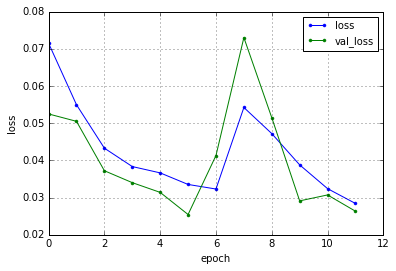

AccY is registed now
Build Complete
(254742,)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=16-SGD
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.3051 - val_loss: 0.3031
Epoch 2/50
7s - loss: 0.3007 - val_loss: 0.2979
Epoch 3/50
7s - loss: 0.2947 - val_loss: 0.2912
Epoch 4/50
6s - loss: 0.2874 - val_loss: 0.2836
Epoch 5/50
8s - loss: 0.2797 - val_loss: 0.2757
Epoch 6/50
6s - loss: 0.2719 - val_loss: 0.2680
Epoch 7/50
6s - loss: 0.2643 - val_loss: 0.2605
Epoch 8/50
6s - loss: 0.2569 - val_loss: 0.2534
Epoch 9/50
6s - loss: 0.2499 - val_loss: 0.2465
Epoch 10/50
6s - loss: 0.2432 - val_loss: 0.2400
Epoch 11/50
5s - loss: 0.2369 - val_loss: 0.2338
Epoch 12/50
5s - loss: 0.2308 - val_loss: 0.2279
Epoch 13/50
5s - loss: 0.2250 - val_loss: 0.2223
Epoch 14/50
5s - loss: 0.2196 - val_loss: 0.2169
Epoch 15/50
5s - loss: 0.2144 - val_loss: 0.2119
Epoch 16/50
5s - loss: 0.2095 - val_lo

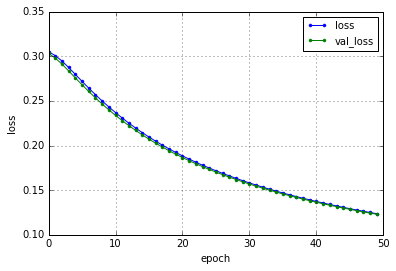

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adadelta
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
7s - loss: 0.1459 - val_loss: 0.0884
Epoch 2/50
7s - loss: 0.0743 - val_loss: 0.0682
Epoch 3/50
6s - loss: 0.0597 - val_loss: 0.0540
Epoch 4/50
6s - loss: 0.0530 - val_loss: 0.0528
Epoch 5/50
6s - loss: 0.0491 - val_loss: 0.0454
Epoch 6/50
6s - loss: 0.0464 - val_loss: 0.0441
Epoch 7/50
8s - loss: 0.0442 - val_loss: 0.0413
Epoch 8/50
6s - loss: 0.0427 - val_loss: 0.0406
Epoch 9/50
6s - loss: 0.0415 - val_loss: 0.0384
Epoch 10/50
6s - loss: 0.0401 - val_loss: 0.0373
Epoch 11/50
6s - loss: 0.0396 - val_loss: 0.0504
Epoch 12/50
6s - loss: 0.0382 - val_loss: 0.0361
Epoch 13/50
5s - loss: 0.0383 - val_loss: 0.0523
Epoch 14/50
5s - loss: 0.0377 - val_loss: 0.0344
Epoch 15/50
5s - loss: 0.0371 - val_loss: 0.0339
Epoch 16/50
5s - loss: 0.0366 - val_loss: 0.0337
Epoch 17/50
5s - loss: 0.0360 - val_loss: 0.0342
Epoch 18/50
5s - loss: 0.0362 - val_loss: 0.0340
Epoch 19/50
5s - los

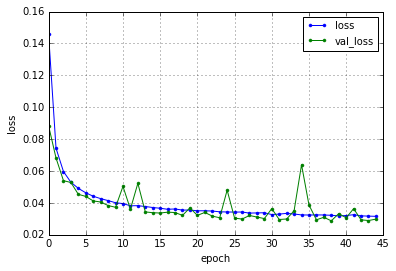

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adamax
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0588 - val_loss: 0.0355
Epoch 2/50
5s - loss: 0.0318 - val_loss: 0.0296
Epoch 3/50
5s - loss: 0.0269 - val_loss: 0.0242
Epoch 4/50
5s - loss: 0.0243 - val_loss: 0.0235
Epoch 5/50
5s - loss: 0.0231 - val_loss: 0.0224
Epoch 6/50
5s - loss: 0.0218 - val_loss: 0.0205
Epoch 7/50
5s - loss: 0.0218 - val_loss: 0.0202
Epoch 8/50
5s - loss: 0.0210 - val_loss: 0.0197
Epoch 9/50
5s - loss: 0.0209 - val_loss: 0.0208
Epoch 10/50
5s - loss: 0.0204 - val_loss: 0.0193
Epoch 11/50
5s - loss: 0.0210 - val_loss: 0.0247
Epoch 12/50
5s - loss: 0.0206 - val_loss: 0.0208
Epoch 13/50
5s - loss: 0.0206 - val_loss: 0.0197
Epoch 14/50
5s - loss: 0.0206 - val_loss: 0.0234
Epoch 15/50
5s - loss: 0.0204 - val_loss: 0.0194
Epoch 16/50
5s - loss: 0.0199 - val_loss: 0.0197


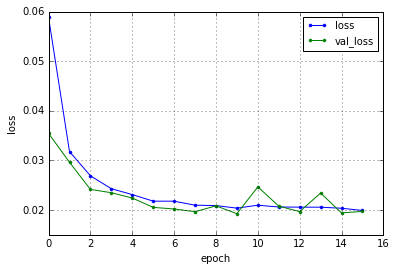

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0679 - val_loss: 0.0423
Epoch 2/50
5s - loss: 0.0392 - val_loss: 0.0380
Epoch 3/50
5s - loss: 0.0347 - val_loss: 0.0316
Epoch 4/50
5s - loss: 0.0323 - val_loss: 0.0284
Epoch 5/50
5s - loss: 0.0298 - val_loss: 0.0262
Epoch 6/50
5s - loss: 0.0301 - val_loss: 0.0277
Epoch 7/50
5s - loss: 0.0279 - val_loss: 0.0255
Epoch 8/50
5s - loss: 0.0271 - val_loss: 0.0266
Epoch 9/50
5s - loss: 0.0273 - val_loss: 0.0264
Epoch 10/50
5s - loss: 0.0258 - val_loss: 0.0232
Epoch 11/50
5s - loss: 0.0252 - val_loss: 0.0237
Epoch 12/50
5s - loss: 0.0248 - val_loss: 0.0231
Epoch 13/50
5s - loss: 0.0249 - val_loss: 0.0239
Epoch 14/50
5s - loss: 0.0252 - val_loss: 0.0239
Epoch 15/50
5s - loss: 0.0276 - val_loss: 0.0254
Epoch 16/50
5s - loss: 0.0248 - val_loss: 0.0245
Epoch 17/50
5s - loss: 0.0242 - val_loss: 0.0248
Epoch 18/50
5s - loss: 0.0252 - val_loss: 0.0226
Epoch 19/50
5s - loss: 0

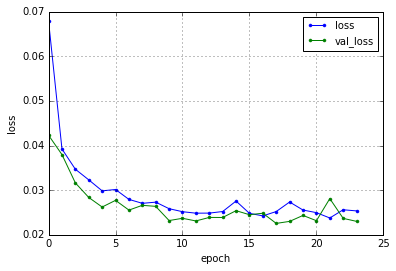

hiden node = 16
-edim=16-Window=4096-Overlap=16-Adagrad
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0732 - val_loss: 0.0539
Epoch 2/50
5s - loss: 0.0498 - val_loss: 0.0450
Epoch 3/50
5s - loss: 0.0437 - val_loss: 0.0395
Epoch 4/50
5s - loss: 0.0393 - val_loss: 0.0401
Epoch 5/50
5s - loss: 0.0361 - val_loss: 0.0349
Epoch 6/50
5s - loss: 0.0345 - val_loss: 0.0321
Epoch 7/50
5s - loss: 0.0325 - val_loss: 0.0325
Epoch 8/50
5s - loss: 0.0313 - val_loss: 0.0284
Epoch 9/50
5s - loss: 0.0307 - val_loss: 0.0281
Epoch 10/50
5s - loss: 0.0295 - val_loss: 0.0270
Epoch 11/50
5s - loss: 0.0286 - val_loss: 0.0274
Epoch 12/50
5s - loss: 0.0279 - val_loss: 0.0257
Epoch 13/50
5s - loss: 0.0273 - val_loss: 0.0303
Epoch 14/50
5s - loss: 0.0269 - val_loss: 0.0250
Epoch 15/50
5s - loss: 0.0264 - val_loss: 0.0240
Epoch 16/50
5s - loss: 0.0260 - val_loss: 0.0316
Epoch 17/50
5s - loss: 0.0255 - val_loss: 0.0285
Epoch 18/50
5s - loss: 0.0251 - val_loss: 0.0239
Epoch 19/50
5s - loss

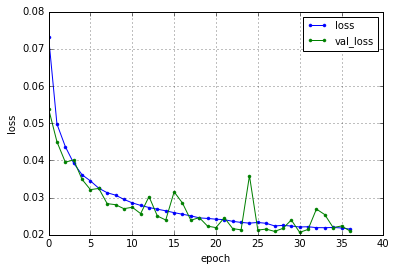

hiden node = 16
-edim=16-Window=4096-Overlap=16-RMSprop
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0775 - val_loss: 0.0552
Epoch 2/50
5s - loss: 0.0559 - val_loss: 0.0519
Epoch 3/50
5s - loss: 0.0531 - val_loss: 0.0506
Epoch 4/50
5s - loss: 0.0501 - val_loss: 0.0563
Epoch 5/50
5s - loss: 0.0482 - val_loss: 0.0448
Epoch 6/50
5s - loss: 0.0466 - val_loss: 0.0500
Epoch 7/50
5s - loss: 0.0454 - val_loss: 0.1153
Epoch 8/50
5s - loss: 0.0448 - val_loss: 0.0430
Epoch 9/50
5s - loss: 0.0440 - val_loss: 0.0411
Epoch 10/50
5s - loss: 0.0432 - val_loss: 0.0374
Epoch 11/50
5s - loss: 0.0424 - val_loss: 0.0933
Epoch 12/50
5s - loss: 0.0417 - val_loss: 0.0402
Epoch 13/50
5s - loss: 0.0411 - val_loss: 0.0362
Epoch 14/50
5s - loss: 0.0403 - val_loss: 0.0475
Epoch 15/50
5s - loss: 0.0404 - val_loss: 0.0356
Epoch 16/50
5s - loss: 0.0395 - val_loss: 0.0394
Epoch 17/50
5s - loss: 0.0397 - val_loss: 0.0358
Epoch 18/50
5s - loss: 0.0392 - val_loss: 0.0416
Epoch 19/50
5s - loss

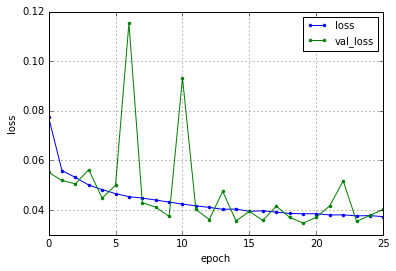

hiden node = 16
-edim=16-Window=4096-Overlap=16-Nadam
Train on 15666 samples, validate on 15666 samples
Epoch 1/50
5s - loss: 0.0880 - val_loss: 0.0621
Epoch 2/50
5s - loss: 0.0645 - val_loss: 0.0600
Epoch 3/50
5s - loss: 0.0590 - val_loss: 0.0572
Epoch 4/50
5s - loss: 0.0591 - val_loss: 0.0604
Epoch 5/50
5s - loss: 0.0558 - val_loss: 0.0607
Epoch 6/50
5s - loss: 0.0552 - val_loss: 0.0530
Epoch 7/50
5s - loss: 0.0519 - val_loss: 0.0485
Epoch 8/50
5s - loss: 0.0503 - val_loss: 0.0559
Epoch 9/50
5s - loss: 0.0503 - val_loss: 0.0428
Epoch 10/50
5s - loss: 0.0464 - val_loss: 0.0504
Epoch 11/50
5s - loss: 0.0489 - val_loss: 0.0533
Epoch 12/50
5s - loss: 0.0449 - val_loss: 0.0450
Epoch 13/50
5s - loss: 0.0417 - val_loss: 0.0445
Epoch 14/50
5s - loss: 0.0448 - val_loss: 0.0404
Epoch 15/50
5s - loss: 0.0501 - val_loss: 0.0588
Epoch 16/50
5s - loss: 0.0494 - val_loss: 0.0647
Epoch 17/50
5s - loss: 0.0481 - val_loss: 0.0455
Epoch 18/50
5s - loss: 0.0487 - val_loss: 0.0417
Epoch 19/50
5s - loss: 

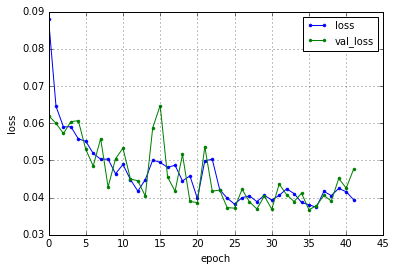

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
